In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from cmdstanpy import CmdStanModel
import arviz as az

In [ ]:
#Excercise 1 - generate data 

In [16]:
F = 6
L = 5
N = (L+F)*100

In [18]:
model_1 = CmdStanModel(stan_file = "code_1.stan")

sim_model_1 = model_1.sample(data = {'N': N}, fixed_param = True)

model_2 = CmdStanModel(stan_file = "code_2.stan")

sim_model_2 = model_2.sample(data = {'N':N}, fixed_param = True)

12:59:10 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

12:59:11 - cmdstanpy - INFO - CmdStan done processing.


12:59:11 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

12:59:16 - cmdstanpy - INFO - CmdStan done processing.


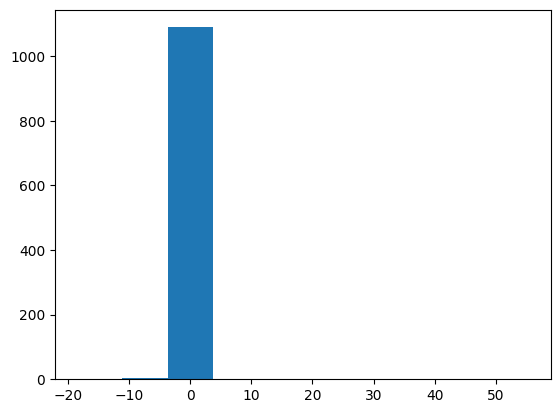

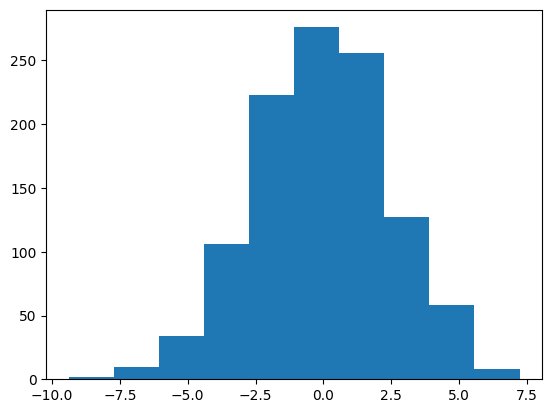

In [22]:
y_1 = sim_model_1.stan_variable('y')[0]
plt.hist(y_1)
plt.show()

y_2= sim_model_2.stan_variable('y')[0]
plt.hist(y_2)
plt.show()

data_1 = {'N':N, 
          'y':y1}

data_2 = {'N':N, 
          'y':y2}

In [ ]:
#Excercise 2 - compare normal and student models for data from first file

In [30]:
model_3 = CmdStanModel(stan_file = "code_3.stan")

fit_model_3 = model_3.sample(data = 
                             data_1,
                             iter_sampling = 1000,
                             iter_warmup = 1, 
                             chains = 1, 
                             fixed_param = True)

fit_model_3_1 = model_3.sample(data = 
                             data_2,
                             iter_sampling = 1000,
                             iter_warmup = 1, 
                             chains = 1, 
                             fixed_param = True)

13:19:06 - cmdstanpy - INFO - compiling stan file C:\Users\micha\Data_Analytics\Lab6\code_3.stan to exe file C:\Users\micha\Data_Analytics\Lab6\code_3.exe
13:19:20 - cmdstanpy - INFO - compiled model executable: C:\Users\micha\Data_Analytics\Lab6\code_3.exe
13:19:20 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

13:19:22 - cmdstanpy - INFO - CmdStan done processing.


13:19:22 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

13:19:25 - cmdstanpy - INFO - CmdStan done processing.


In [31]:
model_4 = CmdStanModel(stan_file = "code_4.stan")

fit_model_4 = model_4.sample(data = 
                             data_1,
                             iter_sampling = 1000,
                             iter_warmup = 1, 
                             chains = 1, 
                             fixed_param = True)

fit_model_4_1 = model_4.sample(data = 
                             data_2,
                             iter_sampling = 1000,
                             iter_warmup = 1, 
                             chains = 1, 
                             fixed_param = True)

13:22:25 - cmdstanpy - INFO - compiling stan file C:\Users\micha\Data_Analytics\Lab6\code_4.stan to exe file C:\Users\micha\Data_Analytics\Lab6\code_4.exe
13:22:38 - cmdstanpy - INFO - compiled model executable: C:\Users\micha\Data_Analytics\Lab6\code_4.exe
13:22:38 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

13:22:41 - cmdstanpy - INFO - CmdStan done processing.


13:22:41 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

13:22:44 - cmdstanpy - INFO - CmdStan done processing.


Text(0.5, 1.0, 'Model 2 data - waic')

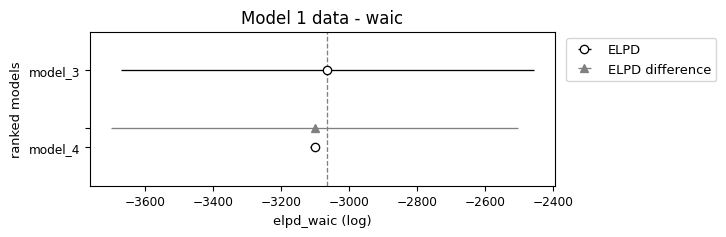

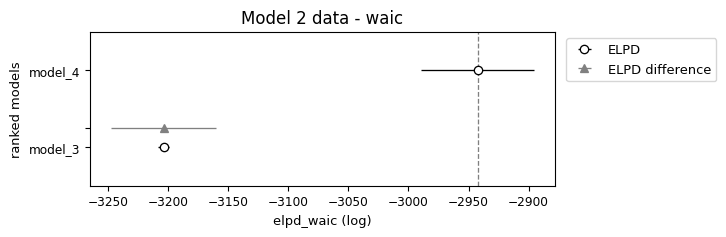

In [35]:
dict_1 = {'model_3':fit_model_3, 'model_4':fit_model_4}
dict_2 = {'model_3':fit_model_3_1, 'model_4':fit_model_4_1}

comparison_waic_1 = az.compare(dict_1, ic='waic')
az.plot_compare(comparison_waic_1)
plt.title('Comparison 1 data - waic')

comparison_waic_2 = az.compare(dict_2, ic='waic')
az.plot_compare(comparison_waic_2)
plt.title('Comparison 2 data - waic')

C:\Users\micha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\arviz\stats\stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
C:\Users\micha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\arviz\stats\stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different

Text(0.5, 1.0, 'Comparison 2 data - loo')

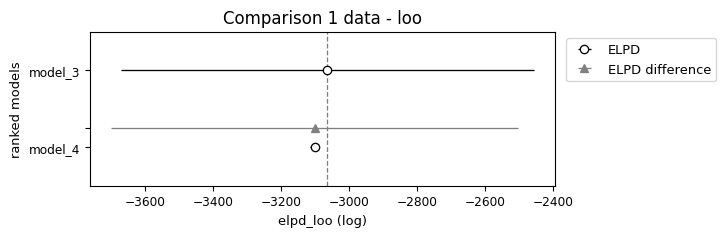

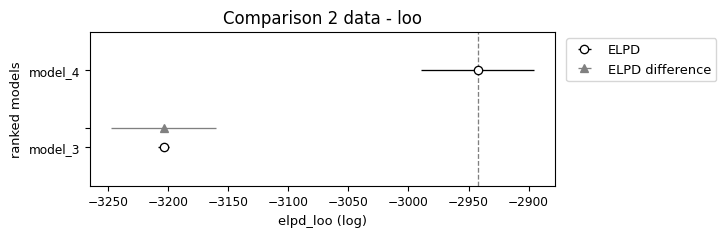

In [39]:
comparison_loo_1 = az.compare(dict_1, ic='loo')
az.plot_compare(comparison_loo_1)
plt.title('Comparison 1 data - loo')

comparison_loo_2 = az.compare(dict_2, ic='loo')
az.plot_compare(comparison_loo_2)
plt.title('Comparison 2 data - loo')

In [ ]:
#Excercise 3 - compare models with different numbers of predictors 

In [42]:
x = sim_model_2.stan_variable('X')

x_1 = x.reshape(1000, -1)[0:1,:N]
x_1 = np.transpose(x_1)

x_2 = x.reshape(1000, -1)[0:2,:N]
x_2 = np.transpose(x_2)

x_3 = x.reshape(1000, -1)[0:3,:N]
x_3 = np.transpose(x_3)

In [46]:
model_5 = CmdStanModel(stan_file = "code_5.stan")

fit_model_5_1 = model_5.sample(data = {'N':N, 
                                       'K':1,
                                       'y':y_2,
                                       'X':x_1},
                               iter_sampling = 1000,
                               iter_warmup = 1, 
                               chains = 1, 
                               fixed_param = True)

fit_model_5_2 = model_5.sample(data = {'N':N, 
                                       'K':2,
                                       'y':y_2,
                                       'X':x_2},
                               iter_sampling = 1000,
                               iter_warmup = 1, 
                               chains = 1, 
                               fixed_param = True)

fit_model_5_3 = model_5.sample(data = {'N':N, 
                                       'K':3,
                                       'y':y_2,
                                       'X':x_3},
                               iter_sampling = 1000,
                               iter_warmup = 1, 
                               chains = 1, 
                               fixed_param = True)

13:50:13 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

13:50:16 - cmdstanpy - INFO - CmdStan done processing.


13:50:16 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

13:50:19 - cmdstanpy - INFO - CmdStan done processing.


13:50:20 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

13:50:23 - cmdstanpy - INFO - CmdStan done processing.


C:\Users\micha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\arviz\stats\stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
C:\Users\micha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\arviz\stats\stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different

Text(0.5, 1.0, 'Model 5 loo comparison')

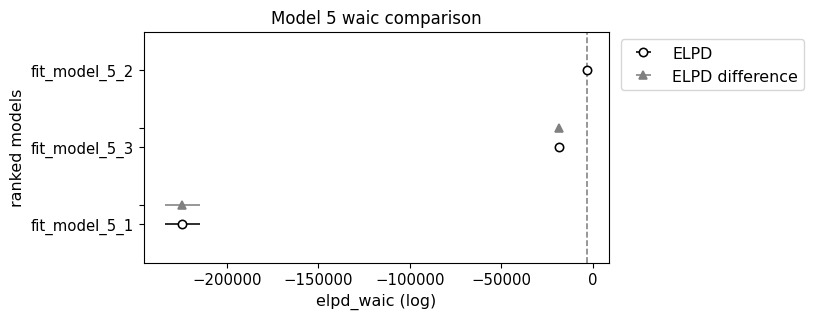

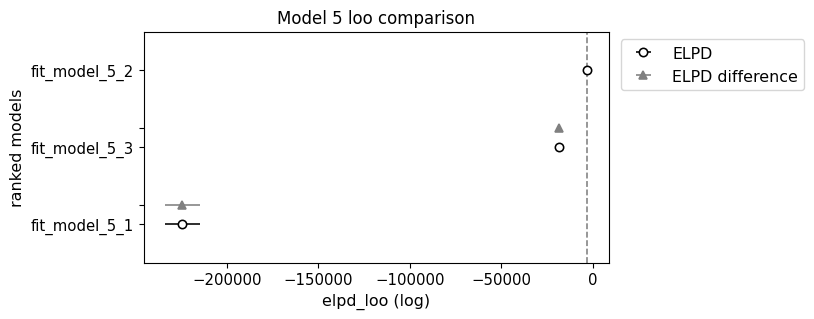

In [47]:
dict_3 = {'fit_model_5_1':fit_model_5_1, 'fit_model_5_2':fit_model_5_2, 'fit_model_5_3':fit_model_5_3}

waic_comparison = az.compare(dict_3, ic='waic')
loo_comparison = az.compare(dict_3, ic='loo')

az.plot_compare(waic_comparison)
plt.title('Model 5 waic comparison')

az.plot_compare(loo_comparison)
plt.title('Model 5 loo comparison')